# Quantum Ensemble as Simple Averaging

### Theory and Implementation 

##### (Fixed $U_{(i,j)}$ for independent quantum trajectories)

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[1]{\left\langle{#1}\right\rangle}$$

### (Step 1) State Preparation

+ Given a 2-qubits $control$ register $(d=2) \implies $  ensemble of $B=2^2$ classifiers


+ $data$ register: *qubit encoding strategy* $\implies$  $N$ $2-$dimensional observations are encoded using $2 \times N$ qubits


$$
\begin{align}
    \text{data register: } \underset{features}{\big( \overset{4}{\underset{i=1}{\otimes}} \left| x_i \right\rangle \big)}\otimes  \underset{ labels}{\big( \overset{4}{\underset{i=1}{\otimes}} \left| y_i \right\rangle \big)}
\end{align}
$$

+ **features**:

$$
\begin{align}
    \left| x_i \right\rangle = x_{i,1}\left| 0 \right\rangle +  x_{i,2}\left| 1 \right\rangle
\end{align}
$$

+ **labels**: if $\left| y_i \right\rangle=\left| 0 \right\rangle$ the $i$-th observation belongs to the class $0$. Otherwise if $\left| y_i \right\rangle=\left| 1 \right\rangle$ the $i$-th observation belongs to the class $1$. 

### (Step 1) State Preparation

\begin{align}
    \left|\Phi_0\right\rangle &=
    \big( H^{\otimes 2} \otimes S_{(x,y)} \big)\left|0\right\rangle \otimes \left|0\right\rangle \otimes \left|0\right\rangle \nonumber \\ 
        & =
   \left|c_1\right\rangle \otimes \left|c_2\right\rangle \otimes \left|x\right\rangle \left|y\right\rangle \nonumber\\
    & =
    \frac{1}{\sqrt{2}}\big(\left|0\right\rangle+\left|1\right\rangle\big) \otimes \frac{1}{\sqrt{2}}\big(\left|0\right\rangle+\left|1\right\rangle\big) \otimes \left|x_0,x_1,x_2,x_3\right\rangle \left|y_0,y_1,y_2,y_3\right\rangle \end{align}

where $S_x$ is the routine which encodes in the amplitudes of a qubit a real vector $x$ and $H$ is the Hadamard transformation.

### (Step 2) Sampling in Superposition

As shown in the **Appendix A**, *Sampling in Superposition* step with $d=2$ leads to the following quantum state:
\begin{align}
\ket{\Phi_{2}}
=  \frac{1}{2}\Big[
 \hspace{.2em} &\ket{00} U_{(2,1)}U_{(1,1)}\ket{x,y} + \ket{01} U_{(2,1)}U_{(1,2)}\ket{x,y} 
\nonumber \\ + & 
\ket{10} U_{(2,2)}U_{(1,1)}\ket{x,y} + \ket{11} U_{(2,2)}U_{(1,2)}\ket{x,y} 
         \Big]  \nonumber \\
 & \hspace{-2.75em} = \frac{1}{\sqrt{4}} \sum_{b=1}^{4} \ket{b} V_b\ket{x,y}
\end{align}

In order to obtain independend quantum trajectories we provide the following definition for $U_{(i,j)}$:
\begin{align}
U_{(1,1)} = \text{swap}(x_0,x_2) \times \text{swap}(y_0,y_2) \nonumber \\
U_{(1,2)} = \text{swap}(x_1,x_3) \times \text{swap}(y_1,y_3) \nonumber \\
U_{(2,1)} = \mathbf{I} \nonumber \\
U_{(2,2)} = \text{swap}(x_2,x_3) \times \text{swap}(y_2,y_3) \nonumber \\
\end{align}
where $ \mathbf{I}$ is the identity matrix. Thus, the step of *Sampling in Superposition* leads to:

\begin{align}
    \ket{\Phi_2} = \frac{1}{2}\Big[ 
    & \ket{11} \ket{x_0, x_3, x_1, x_2}  \ket{y_0, y_3, y_1, y_2} + \ket{10} \ket{x_2, x_1, x_3, x_0} \ket{y_2, y_1, y_3, y_0} \nonumber \\
    + &
    \ket{01} \ket{x_0, x_3, x_2, x_1} \ket{y_0, y_3, y_2, y_1} +
    \ket{00} \ket{x_2, x_1, x_0, x_3} \ket{y_2, y_1, y_0, y_3}
    \Big]
\end{align}

Swap operations allows to entangle different observations (in terms of the indices of the qubits) to different state of the $control$ register. In particular, if considering the last qubit of the *features* and *labels* (sub-)registers, the above choice for $U_{(i,j)}$ guarantees that each quantum state of the control register is entangled with a different training observation. Using a compact representation:

\begin{align}
     \left|\Phi_{2^{'}}\right\rangle = \frac{1}{2}\Big[
    \left|11\right\rangle \left|x_2\right\rangle  \left|y_2\right\rangle  
    + 
    \left|10\right\rangle\left|x_0\right\rangle\left|y_0\right\rangle 
    +
    \left|01\right\rangle\left|x_1\right\rangle\left|y_1\right\rangle 
    +
    \left|00\right\rangle\left|x_3\right\rangle \left|y_3\right\rangle 
    \Big] =
    \frac{1}{\sqrt{4}}\sum_{i=0}^{3}\left|i\right\rangle\left|x_i,y_i\right\rangle
\end{align}

**NB:** in this case the $i$-th basis state does not correspond to the integer representation of the binary state. 

### (Step 3) Learning via interference

First, the $test$ register is initialised to encode the test set, $\tilde{x}$, considering also an additional register to store the final prediction:
\begin{align}
    (S_{\tilde{x}} \otimes \mathbb{1}) \left|0\right\rangle \left|0\right\rangle =\left|x^{(test)}\right\rangle \left|0\right\rangle
\end{align}
Then, the $data$ and $test$ registers interact via interference using the quantum version of the cosine classifier (gate $F$) to compute the estimates of the target variable:

\begin{align}
    \left|\Phi_{f}\right\rangle 
                = & \Big(\mathbb{1}^{\otimes 2} \otimes F \Big) \left|\Phi_{d}\right\rangle \nonumber \\ 
                = & (\mathbb{1}^{\otimes d} \otimes F )\Bigg[\frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \left|b\right\rangle \left|x_b, y_b\right\rangle\Bigg] \otimes \left|x^{(test)}\right\rangle \left|0\right\rangle  \nonumber \\ 
                = & \frac{1}{\sqrt{2^d}}\sum_{b=1}^{2^d} \left|b\right\rangle \left|x_b, y_b\right\rangle\left|x^{(test)}\right\rangle \left|\hat{f}_b\right\rangle
\end{align}
where $\hat{f}_b$ represents the $b$-th prediction for $\tilde{x}$ given the  $b$-th training set. 

### (Step 4) Measurement
\begin{align}
    \left\langle M \right\rangle = &  
    \frac{1}{2^d}\sum_{b=1}^{2^d} \left\langle\hat{f}_b|M|\hat{f}_b\right\rangle =
    \frac{1}{2^d}\sum_{b=1}^{2^d}\left\langle M_b \right\rangle  \nonumber \\
    = & \frac{1}{B} \sum_{b=1}^B \hat{f}_b = \hat{f}_{bag}(\tilde{x}|x,y)
\end{align}

## Implementation

In [1]:
# Import pakages and functions
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

In [2]:
# load the toy dataset
X_data, Y_data, x_test = load_data_custom()

# Generate the quantum circuit
qc = ensemble_fixed_U(X_data, Y_data, x_test)

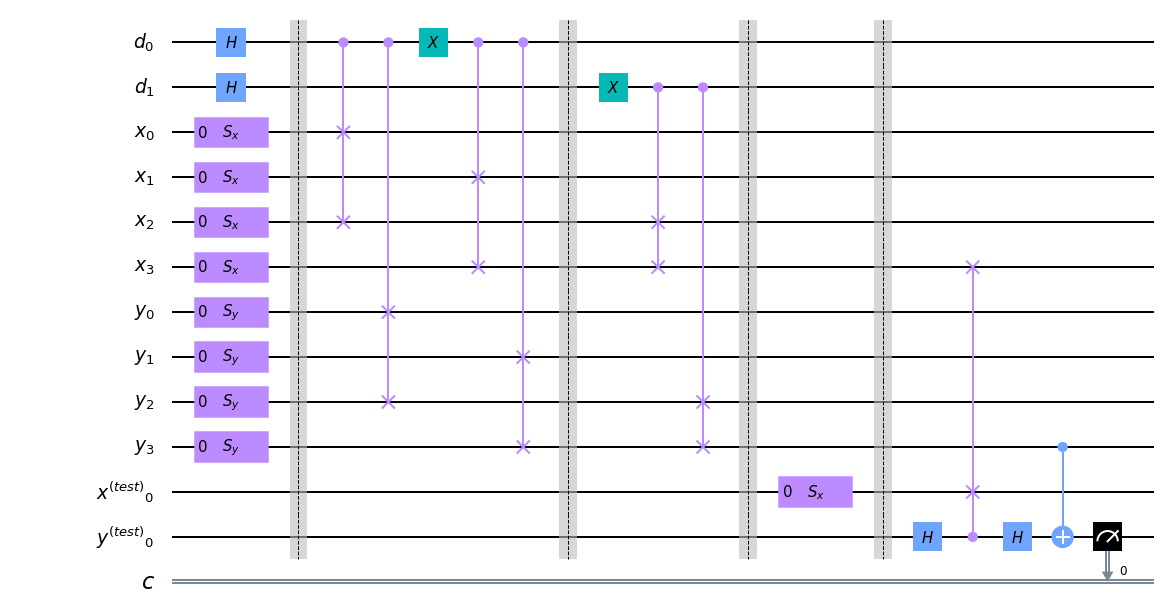

In [3]:
qc.draw(output='mpl', scale=.6,
        style={'fontsize':15, 'dpi':200})

In [4]:
# Load data without normalisation
X_data, Y_data, x_test = load_data_custom(normalize = False)

# Create table as shown in the paper (Table 1)
data = pd.DataFrame(X_data, columns = [r'$X_1$', r'$X_2$'])

# Extract the value of the target variable as integer
y = [c[1] for c in Y_data]

# Compute the cosine distance between the training points and the test point
dist = [cosine_similarity([x], [x_test])[0][0] for x in X_data]

# Compute the value of the cosine distance classifier
# for the four training points from the test point
p = [cosine_classifier(x, x_test)[0][0] for x in X_data]

# Extract the probabilities for the test point to be classified in class 
# 1 according to the (classical) cosine classifies Equation (16)
probs = []
for i,j in zip(y,p):
    if i == 0:
        probs.append(1-j)
    else:
        probs.append(j)

# Create dataset as in paper (Table 1)
probs = np.array(probs)

# Rename columns
data[r'$y$'] = np.array(y)
data['$distance$'] = np.round(dist,2)
data[r'Prediction'] = probs

# Rename rows
data.index = [r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$',]

In [5]:
#Visualize dataset
data

,$X_1$,$X_2$,$y$,$distance$,Prediction
$x_1$,1,3,0,0.89,0.10
$x_2$,-2,2,1,0.00,0.50
$x_3$,3,0,0,0.71,0.25
$x_4$,3,1,1,0.89,0.90


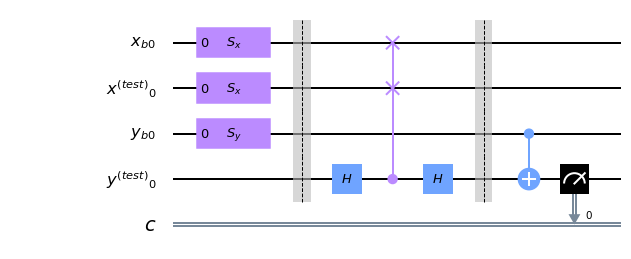

In [6]:
# Load normalised data
X_data, Y_data, x_test = load_data_custom()

#Visualisation of quantum cosine classifier
quantum_cosine = quantum_cosine_classifier(X_data[0], x_test, Y_data[0] )
quantum_cosine.draw(output='mpl', scale=.7)

#### For each training point in *data* the quantum cosine classifier is executed to compute the prediction of the target variable for the test point $\tilde{x}$. Thus, given the measurements of the quantum circuts, the target probabilities are retrieved using the function *retrieve_proba*

In [7]:
qc1 = quantum_cosine_classifier(X_data[0], x_test, Y_data[0] )
r1 = exec_simulator(qc1)
r1 = retrieve_proba(r1) 

qc2 = quantum_cosine_classifier(X_data[1], x_test, Y_data[1])
r2 = exec_simulator(qc2)
r2 = retrieve_proba(r2)

qc3 = quantum_cosine_classifier(X_data[2], x_test, Y_data[2])
r3 = exec_simulator(qc3)
r3 = retrieve_proba(r3)

qc4 = quantum_cosine_classifier(X_data[3], x_test, Y_data[3])
r4 = exec_simulator(qc4)
r4 = retrieve_proba(r4)

out = [r1, r2, r3, r4]

We compute the average of predictions provided by the four quantum cosine classifiers that corresponds to the classical ensemble prediction:

In [8]:
p0 = [p[0] for p in out]
p1 = [p[1] for p in out]
r_avg = [np.mean(p0), np.mean(p1)]
print(np.mean(p0), np.mean(p1))

0.5625 0.4375


In [10]:
r = exec_simulator(qc, n_shots=8192)
r_ens = retrieve_proba(r)
print(r_ens)

[0.5718994140625, 0.4281005859375]


In [11]:
# collect the results
output_simulator = [r1, r2, r3, r4, r_avg, r_ens]

data_pred = pd.DataFrame(output_simulator, 
                         columns=['p0', 'p1'], index=['qc1','qc2','qc3','qc4','AVG','Ensemble'])
data_pred
# data_pred.to_csv('output/sim_results.csv', index=False)

,p0,p1
qc1,0.903442,0.096558
qc2,0.500854,0.499146
qc3,0.744995,0.255005
qc4,0.100708,0.899292
AVG,0.562500,0.437500
Ensemble,0.571899,0.428101


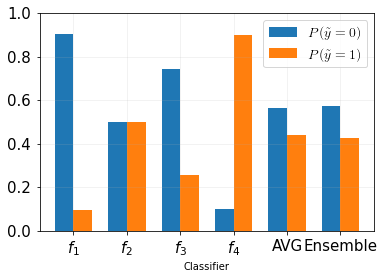

In [12]:
plot_cls(output_simulator, title= '')

### Multiple Experiments

In order to show that the result of quantum ensemble holds regardless of the data reported in *Table 1*, the same experiment is performed on $20$ randomly generated datasets, and the average of the quantum cosine classifiers and the quantum ensemble prediction are compared

In [13]:
seed = 543

n_shots = 8192
N_runs = 20
y_labels =[[0,1], [1,0]]


p1_avg = []
p1_ens = []

np.random.seed(seed)
for run in np.arange(N_runs):
    # print(run)
    x1 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x2 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x3 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x4 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    
    y1 = y_labels[np.random.randint(0, 2)]
    y2 = y_labels[np.random.randint(0, 2)]
    y3 = y_labels[np.random.randint(0, 2)]
    y4 = y_labels[np.random.randint(0, 2)]
    
    Y_data = [y1, y2, y3, y4]  
    X_data = [x1, x2, x3, x4]
    
    x_test = [np.random.randint(1, 9), np.random.randint(1, 9)]

    X_data, Y_data, x_test = load_data_custom(X_data, Y_data, x_test = x_test)

    qc1 = quantum_cosine_classifier(X_data[0], x_test, Y_data[0] )
    r1 = exec_simulator(qc1)
    r1 = retrieve_proba(r1)

    qc2 = quantum_cosine_classifier(X_data[1], x_test, Y_data[1])
    r2 = exec_simulator(qc2)
    r2 = retrieve_proba(r2)

    qc3 = quantum_cosine_classifier(X_data[2], x_test, Y_data[2])
    r3 = exec_simulator(qc3)
    r3 = retrieve_proba(r3)

    qc4 = quantum_cosine_classifier(X_data[3], x_test, Y_data[3])
    r4 = exec_simulator(qc4)
    r4 = retrieve_proba(r4)
     
    out = [r1, r2, r3, r4]

    p0 = [p[0] for p in out]
    p1 = [p[1] for p in out]
    
    r_avg = [np.mean(p0), np.mean(p1)]
    # print('AVG:', r_avg)

    
    qc = ensemble_fixed_U(X_data, Y_data, x_test)
    qc = transpile(qc, basis_gates = ['u1', 'u2', 'u3', 'cx'], optimization_level=3)

    r = exec_simulator(qc, n_shots=n_shots)
    r_ens = retrieve_proba(r)
    # print('Ensemble', r_ens)

    out = [r1, r2, r3, r4, r_avg, r_ens]
    
    p1_avg.append(r_avg[1])
    p1_ens.append(r_ens[1])

## Plot comparison on multiple dataset

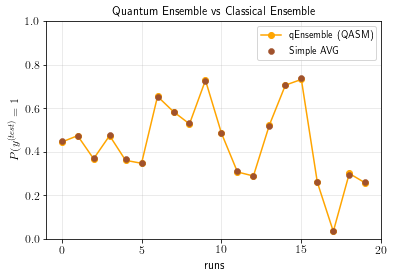

In [14]:
avg_vs_ensemble(p1_avg, p1_ens)

In [17]:
# Execution on real device
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
# backend_16 = provider.get_backend('ibmq_16_melbourne')
# backend_5 = provider.get_backend('ibmq_rome')

def run_real_device(qc, backend, shots=8192):
    job = execute(qc, backend, shots=shots)
    results = job.result()
    r = results.get_counts(qc)
    return r

ibmqfactory.load_account:WARNING:2020-09-30 00:17:36,962: Credentials are already in use. The existing account in the session will be replaced.
